In [28]:
#https://raw.github.com/carljv/Will_it_Python/master/MLFH/ch8/ch8.ipynb
import numpy as np
from sklearn.decomposition import PCA
from pandas import *
import datetime as dt
import statsmodels.api as sm

root = 'J:\\Files\\Programming\\workspace\\GonzaloPython\\InputFiles\\'
prices_long = read_csv(root + 'stock_prices.csv', index_col = [0, 1], 
                       parse_dates = True, squeeze = True)
dji_all     = read_csv(root + 'dji.csv', index_col = 0, parse_dates = True)

In [29]:
calc_returns = lambda x: np.log(x / x.shift(1))[1:]
scale        = lambda x: (x - x.mean()) / x.std()
    
def OLSreg(y, Xmat):
    return sm.OLS(y, sm.add_constant(Xmat, prepend = True)).fit()

In [30]:
prices = prices_long.unstack()
#tickers = list(prices.columns)
dates = list(prices.index)
dates.remove(dt.datetime(2002, 2, 1))
prices = prices.drop('DDR', axis = 1)
prices = prices.drop([dt.datetime(2002, 2, 1)])

In [31]:
returns = prices.apply(calc_returns)

In [32]:
dji_all = dji_all.sort_index()
dji = dji_all['Close'].reindex(index = dates)
dji_ret = calc_returns(dji)

In [33]:
def make_pca_index(data, scale_data = True):
    '''
    Compute the correlation matrix of a set of stock data, and return
    the first principal component.

    By default, the data are scaled to have mean zero and variance one
    before performing the PCA.
    '''
    if scale_data:
        data_std = data.apply(scale)
    else:
        data_std = data
    corrs = np.asarray(data_std.cov())
    pca   = PCA(n_components = 1).fit(corrs)
    mkt_index = -scale(pca.transform(data_std))
    return mkt_index

In [34]:
price_index = make_pca_index(prices)

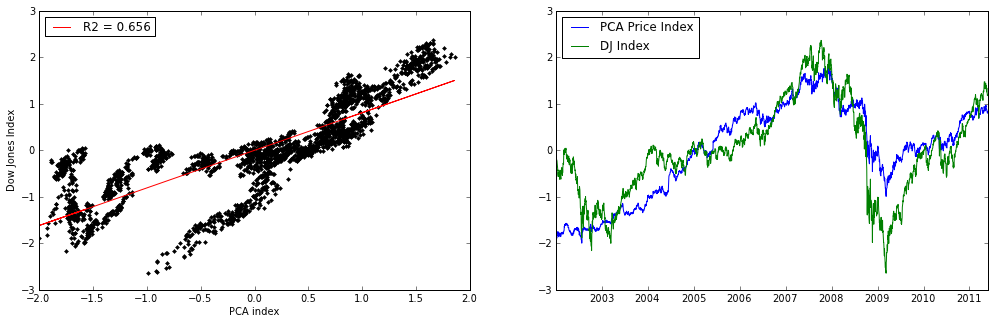

In [35]:
plt.figure(figsize = (17, 5))
plt.subplot(121)
plt.plot(price_index, scale(dji), 'k.')
plt.xlabel('PCA index')
plt.ylabel('Dow Jones Index')
ols_fit = OLSreg(scale(dji), price_index)
plt.plot(price_index, ols_fit.fittedvalues, 'r-', 
         label = 'R2 = %4.3f' % round(ols_fit.rsquared, 3))
plt.legend(loc = 'upper left')
plt.subplot(122)
plt.plot(dates, price_index, label = 'PCA Price Index')
plt.plot(dates, scale(dji), label = 'DJ Index')
plt.legend(loc = 'upper left')

In [36]:
returns_index = make_pca_index(returns)

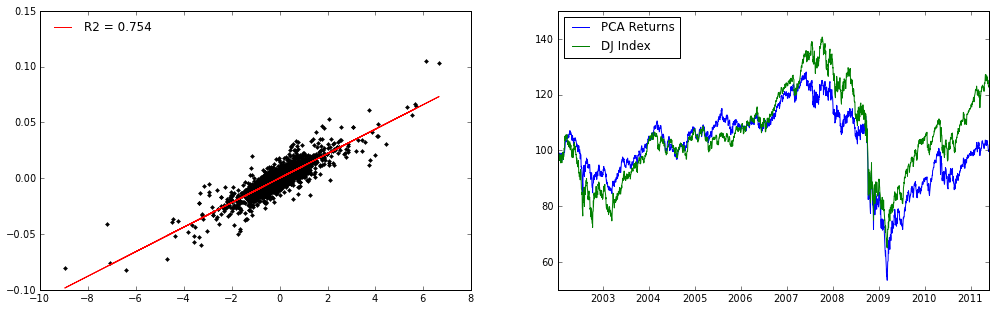

In [37]:
ols_fit = OLSreg(dji_ret, returns_index)
plt.figure(figsize = (17, 5))
plt.subplot(121)
plt.plot(returns_index, dji_ret, 'k.')
plt.plot(returns_index, ols_fit.fittedvalues, 'r-', 
         label = ('R2 = %4.3f' % round(ols_fit.rsquared, 3)))
plt.legend(loc = 'upper left', frameon = False)
plt.subplot(122)
plt.plot(dates[1:], 100*np.exp((returns_index * dji_ret.std()).cumsum()), 
         label = 'PCA Returns')
plt.plot(dates[1:],c
plt.legend(loc = 'upper left')

In [38]:
pca_fit = PCA(n_components = 24).fit(returns.corr())

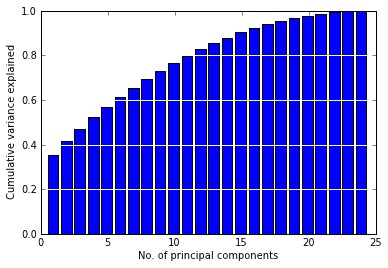

In [39]:
plt.bar(arange(24) + .5, pca_fit.explained_variance_ratio_.cumsum())
plt.ylim((0, 1))
plt.xlabel('No. of principal components')
plt.ylabel('Cumulative variance explained')
plt.grid(axis = 'y', ls = '-', lw = 1, color = 'white')